In [1]:
"""
1-  Extraer los siguentes estadísiticos del conjunto de datos para varias de las varibles disponibles:
    
- Tabla de contingencia
- Coeficiente de correlación de las variables numéricas del dataset.
- Sesgos de alguna de las variables numéricas del dataset.
- Intervalo de confianza de algunas de las variables numéricas del dataset

"""

'\n\n   1-  Extraer los siguentes estadísiticos del conjunto de datos para varias de las varibles disponibles:\n\n- Tabla de contingencia\n- Coeficiente de correlación de las variables numéricas del dataset.\n- Sesgos de alguna de las variables numéricas del dataset.\n- Intervalo de confianza de algunas de las variables numéricas del dataset\n\nInterpretación de los resultados.\nAhora interpreta los resultados obtenidos de los diferentes estadísticos estudiados haciendo hincapié en aspectos interesantes de tus datos y explica lo mejor posible la naturaleza de los mismos.\n\n\n'

In [2]:
import numpy as np
from scipy import stats # importando scipy.stats
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from pydataset import data


In [3]:
df_vino_tinto = pd.read_csv("data/winequality-red.csv", sep = ";")
df_vino_tinto.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df_vino_tinto["alcohol"].min()

8.4

In [5]:
df_vino_tinto["alcohol"].max()

14.9

In [6]:
def cambiar_alcohol(col):
    if col <= 10:
        return "baja"
    elif col > 10 and col <= 12:
     return "media"
    else:       
        return "alta"
  

In [7]:
df_vino_tinto["niveles_grados"] = df_vino_tinto["alcohol"].apply(cambiar_alcohol)

In [8]:
df_vino_tinto

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,niveles_grados
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,baja
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,baja
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,baja
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,baja
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,baja
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,media
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,media
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,media
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,media


In [9]:
df_vino_crosstab = pd.crosstab(df_vino_tinto['quality'], df_vino_tinto['niveles_grados']) 

In [11]:
df_vino_crosstab

niveles_grados,alta,baja,media
quality,,,
3,0,6,4
4,1,28,24
5,11,475,195
6,63,217,358
7,57,19,123
8,9,2,7


In [12]:
#  Coeficiente de correlación de las variables numéricas del dataset:

matriz_correlacion = df_vino_tinto.corr()

In [13]:
matriz_correlacion

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


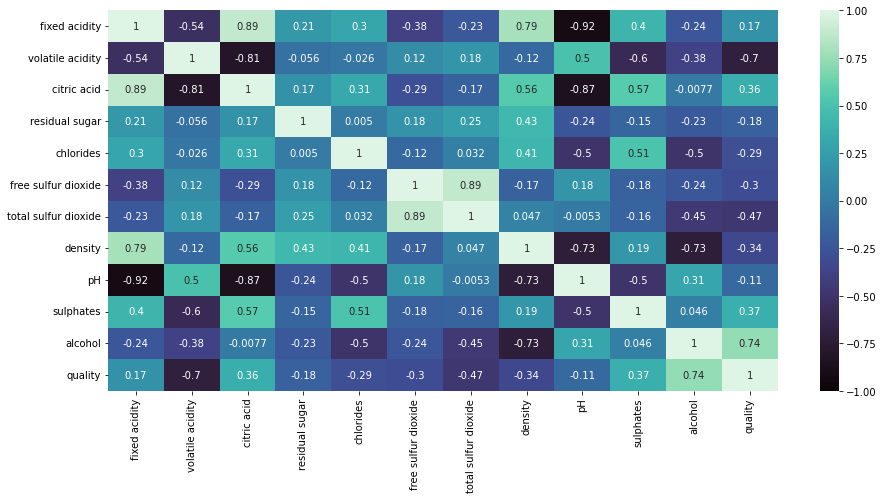

In [15]:
plt.figure(figsize = (15,7))
sns.heatmap(matriz_correlacion.corr(),
cmap = "mako", 
annot = True,            
vmin = -1,    
vmax = 1,   
);

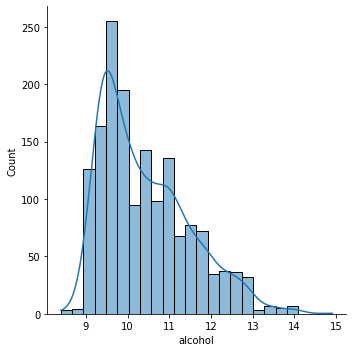

In [16]:
# Sesgos:

sns.displot(df_vino_tinto["alcohol"], kde= True);

In [18]:
# Intervalo de confianza de algunas de las variables numéricas del dataset:

datos = df_vino_tinto['residual sugar']
print(stats.t.interval(alpha=0.95, df=len(datos)-1, loc=np.mean(datos), scale=stats.sem(datos)))
print(np.mean(datos))

(2.4696463165556928, 2.6079646903236107)
2.5388055034396517


In [ ]:
""" 
    2- Interpretación de los resultados:
Ahora interpreta los resultados obtenidos de los diferentes estadísticos estudiados haciendo hincapié en aspectos interesantes de tus datos y explica lo mejor posible la naturaleza de los mismos.

"""

In [ ]:

"""
- La gráfica de sesgo que hace referencia al "alcohol" está sesgada a la derecha. Es un sesgo de valor positivo. Esto 
  quiere decir que tenemos muchos más datos de vinos con graduación media-baja que de alta. Esto puede deberse a que el vino más comercial es aquel que tiene valores de alcohol medios o bajos.
  
- En la tabla de correlación podemos visualizar que la relación entre Ph y ácido cítrico tienen una negativa, a más ácido cítrico , más baja el ph. En cuanto 
  a relación entre alcohol y azucar, vemos que no tienen conexión ninguna ya que su valor se acerca a 0.
-
-
-
"""